#**Importing Libraries**

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os
print("Lib done")

Lib done


# **Reading Dataset**

In [88]:
orders=pd.read_csv(r"/content/SampleSuperstore.csv")
print("Data Read done")

Data Read done


# **Exploratory Data Analysis**

# **Dim of Data**

In [5]:
orders.shape

(9994, 13)

# **Peeks of Data**

# **First 10 elements**

In [6]:
orders.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# **Last 10 elements**

In [7]:
orders.tail(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# **Columns in data**

In [8]:
orders.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# **Category unique types in data**

In [9]:
orders["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

#**Sub-category unique types in data**

In [10]:
orders["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

# **Get unique types of Segments in data**

In [15]:
orders["Segment"].unique()


array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [89]:
orders=orders.drop(columns=["Postal Code"], axis=1)

# **Peek in Data**

In [19]:
orders.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **Number of Products in each category**

In [20]:
orders["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

# **Total number of Products in each category**

In [21]:
orders["Category"].value_counts().sum()

9994

# **Number of sub category in each category are divided**

In [22]:
orders["Sub-Category"].nunique()

17

# **Total number of Products in each sub category**

In [23]:
orders["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

# **Different Types of Regions**

In [24]:
orders["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

# **Unique states in Dataset**

In [25]:
orders["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

# **Types of Shipping modes**

In [26]:
orders["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

# **Unique Cities in Data Set**

In [27]:
orders["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

# **Number of unique in each column**

In [28]:
orders.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# **Information about data**

In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


# **Statistical Description of Data**

In [30]:
orders.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# **Total numbers of null values in data**

In [31]:
orders.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# **Different Data Types of data**

In [32]:
orders.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

# **Unique data in each column**

In [33]:
for col in orders:
  print(orders[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 

# **Number of duplicate values in data set**

In [34]:
orders.duplicated().sum()

50

# **Vis of Unknown and missing data**

<Axes: >

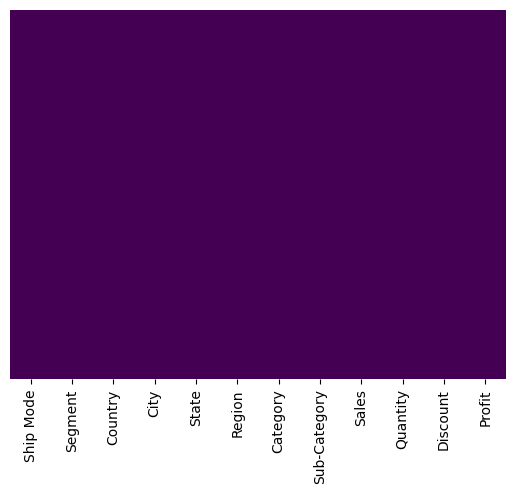

In [35]:
sns.heatmap(orders.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# **Eliminating Duplicate Data in Data Set**

In [36]:
orders.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# **Correlation of orders column**

In [37]:
orders.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


# **Covariance of orders column**

In [38]:
orders.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


# **Slicing up of data in data set**

In [39]:
orders.iloc[0]

Ship Mode        Second Class
Segment              Consumer
Country         United States
City                Henderson
State                Kentucky
Region                  South
Category            Furniture
Sub-Category        Bookcases
Sales                  261.96
Quantity                    2
Discount                  0.0
Profit                41.9136
Name: 0, dtype: object

In [40]:
orders.iloc[:,0]

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: Ship Mode, Length: 9994, dtype: object

# **Summary of Data in Data Set**

In [41]:
orders.value_counts()

Ship Mode       Segment      Country        City           State         Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Los Angeles    California    West     Office Supplies  Paper         19.440   3         0.0        9.3312      4
                Corporate    United States  Houston        Texas         Central  Office Supplies  Paper         15.552   3         0.2        5.4432      3
                Consumer     United States  San Francisco  California    West     Office Supplies  Paper         25.920   4         0.0        12.4416     2
                                            Detroit        Michigan      Central  Furniture        Chairs        389.970  3         0.0        35.0973     2
                                            Philadelphia   Pennsylvania  East     Office Supplies  Paper         20.736   4         0.2        7.2576      2
                                                               

# **Vis of Data in Data Set**

## Bar plot b/w Sub-cat vs cat

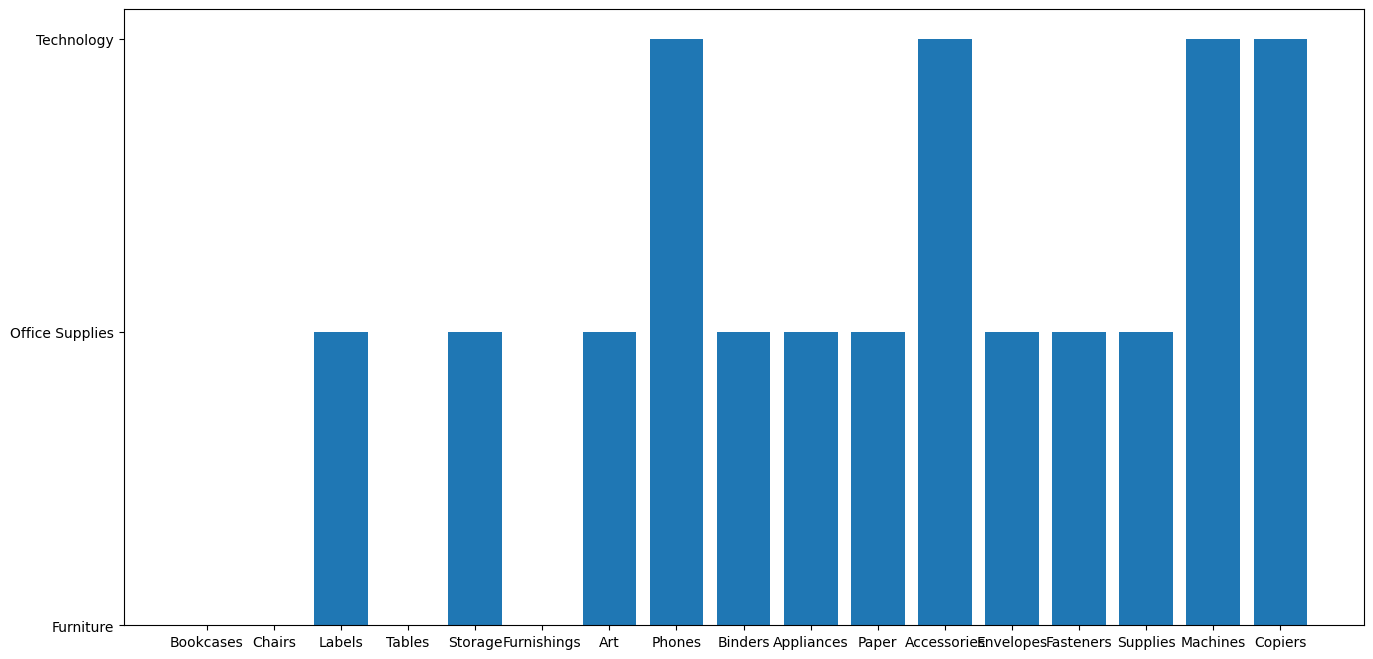

In [42]:
plt.figure(figsize=(16,8))
plt.bar("Sub-Category","Category",data=orders)
plt.show()

## Pie Plot of Sub-Category

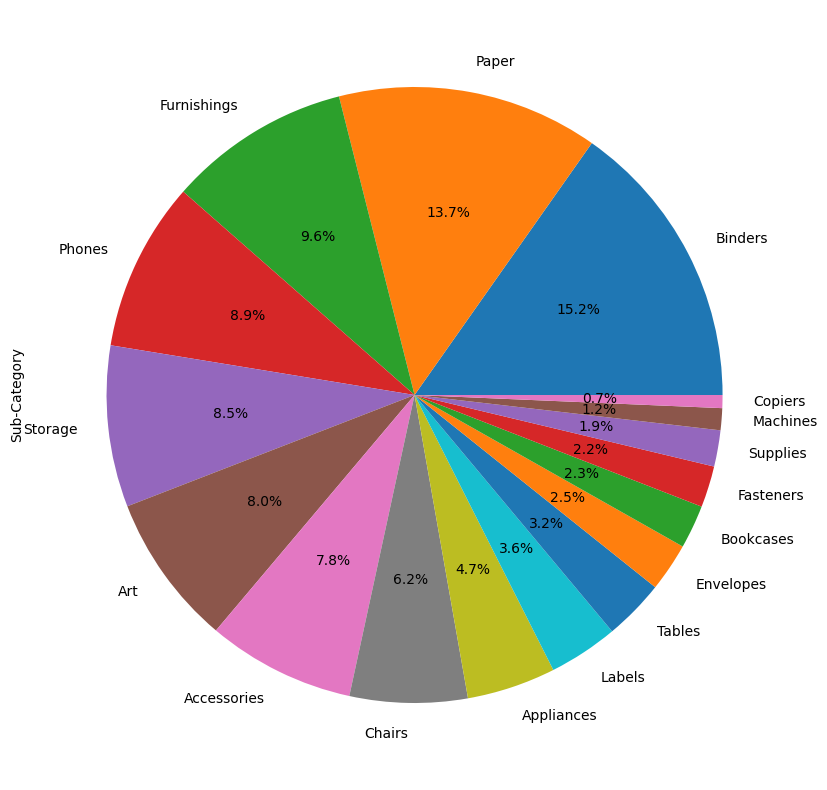

In [43]:
plt.figure(figsize=(12,10))
orders["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# **Bar plot of Sales / Profit**

Text(0.5, 1.0, 'Total profit and Sales per sub cat')

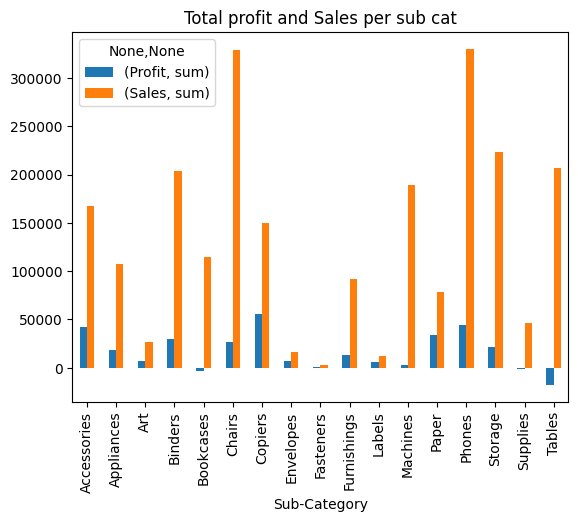

In [44]:
orders.groupby("Sub-Category")["Profit","Sales"].agg(["sum"]).plot.bar()
plt.title("Total profit and Sales per sub cat")

#**Count plot of cities in Data**

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

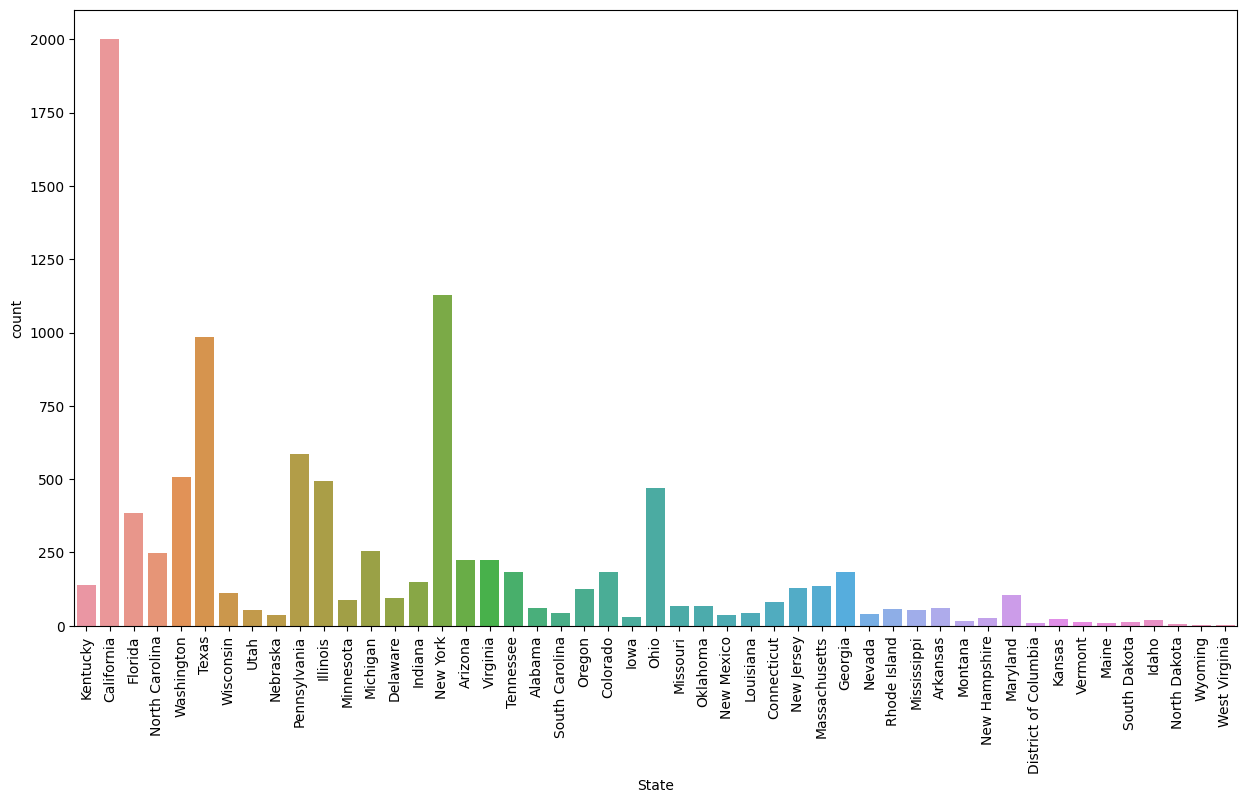

In [45]:
print(orders["State"].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=orders["State"])
plt.xticks(rotation=90)
plt.show()

# **Profit and Sales per region**

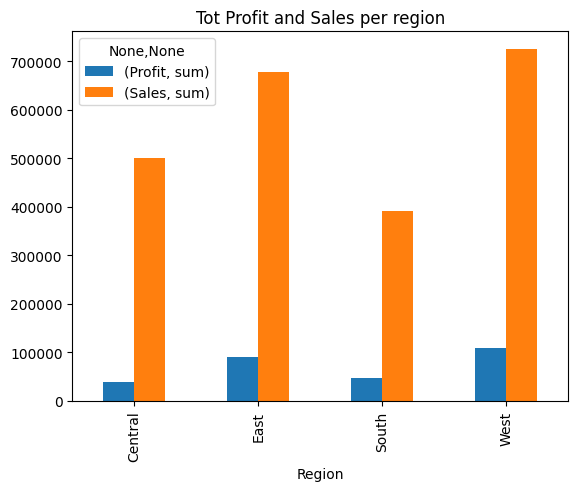

In [46]:
orders.groupby("Region")["Profit","Sales"].agg(["sum"]).plot.bar()
plt.title("Tot Profit and Sales per region")
plt.rcParams["figure.figsize"]=[10,8]
plt.show()

# **Count plot of Sub Cat**

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


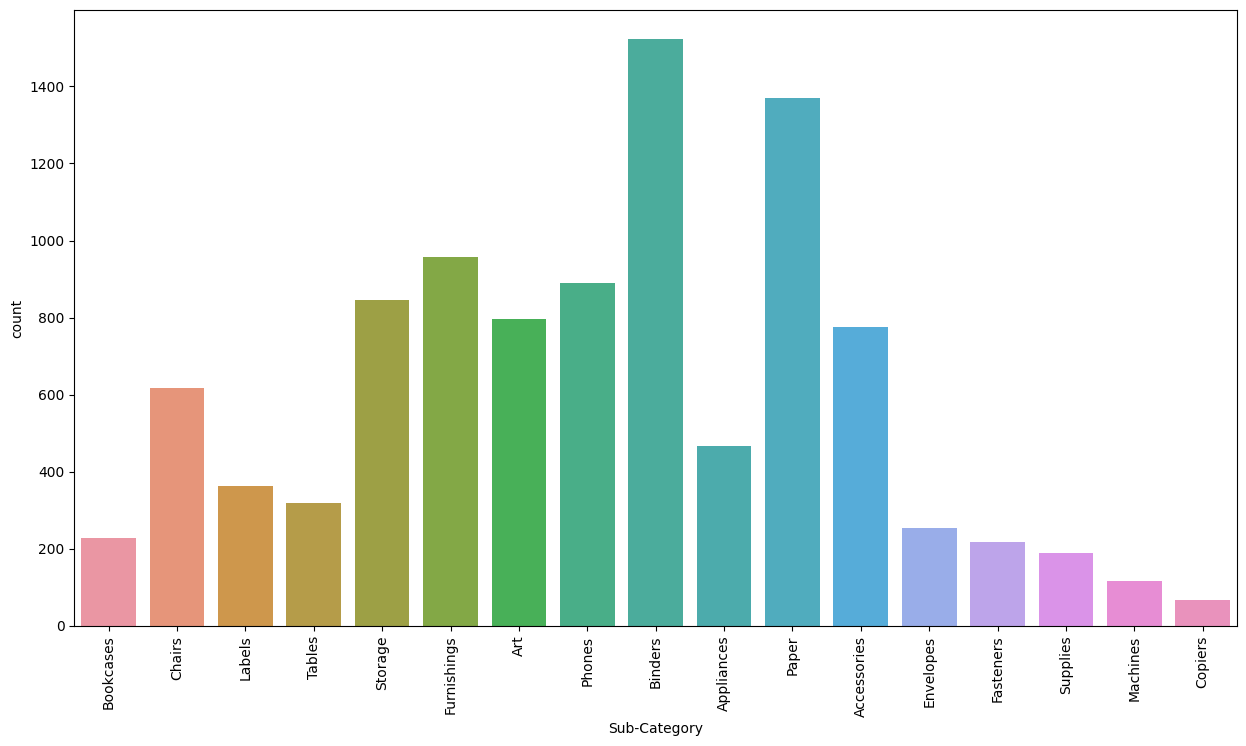

In [47]:
print(orders["Sub-Category"].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=orders["Sub-Category"])
plt.xticks(rotation=90)
plt.show()

# **Heat Map of Correlation in Columns**

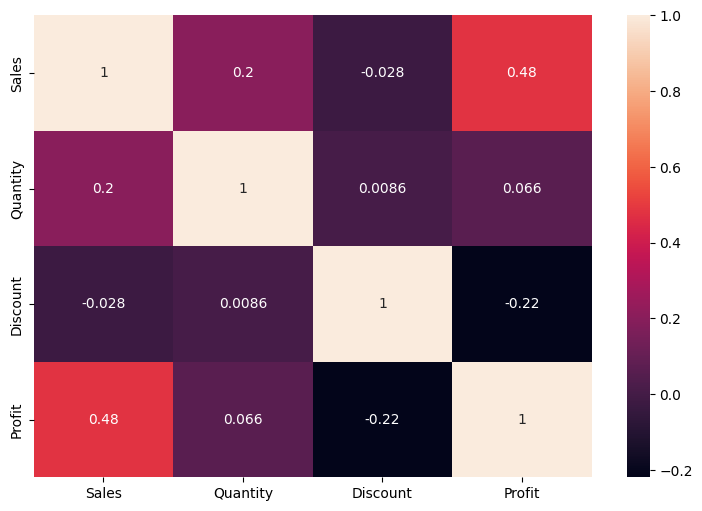

In [51]:
fig,axes=plt.subplots(1,1,figsize=(9,6))
sns.heatmap(orders.corr(), annot=True)
plt.show()

# **Heat map of Covariance in columns**

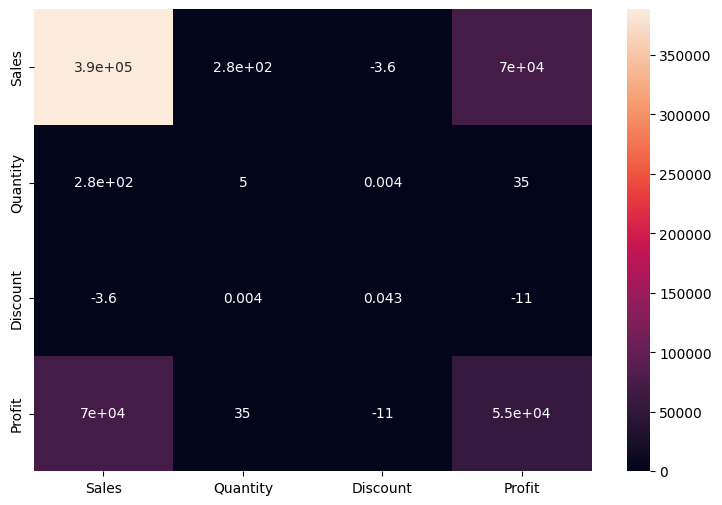

In [52]:
fig,axes=plt.subplots(1,1,figsize=(9,6))
sns.heatmap(orders.cov(), annot=True)
plt.show()

# **Segment in count plot**

<Axes: xlabel='Segment', ylabel='count'>

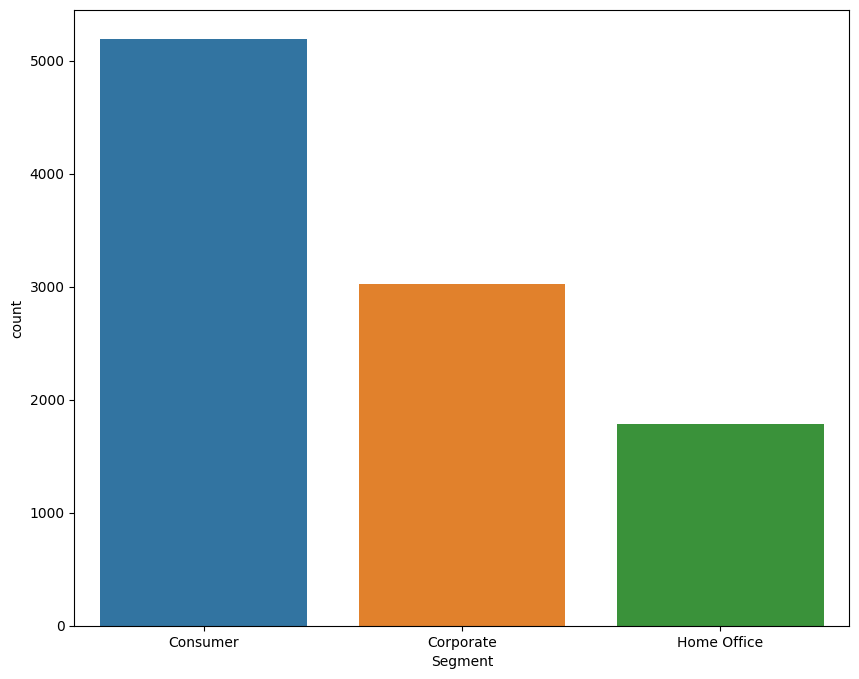

In [53]:
sns.countplot(x=orders["Segment"])

# **Region of Count Plot**

<Axes: xlabel='Region', ylabel='count'>

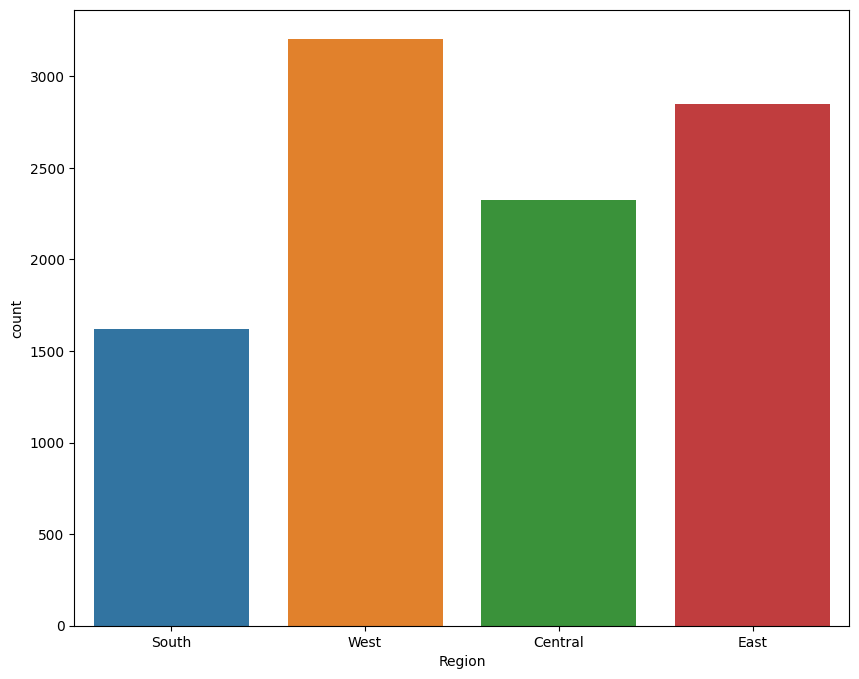

In [54]:
sns.countplot(x=orders["Region"])

# **Bar Plot of sub-cat Vs Profit**

<Axes: xlabel='Sub-Category', ylabel='Profit'>

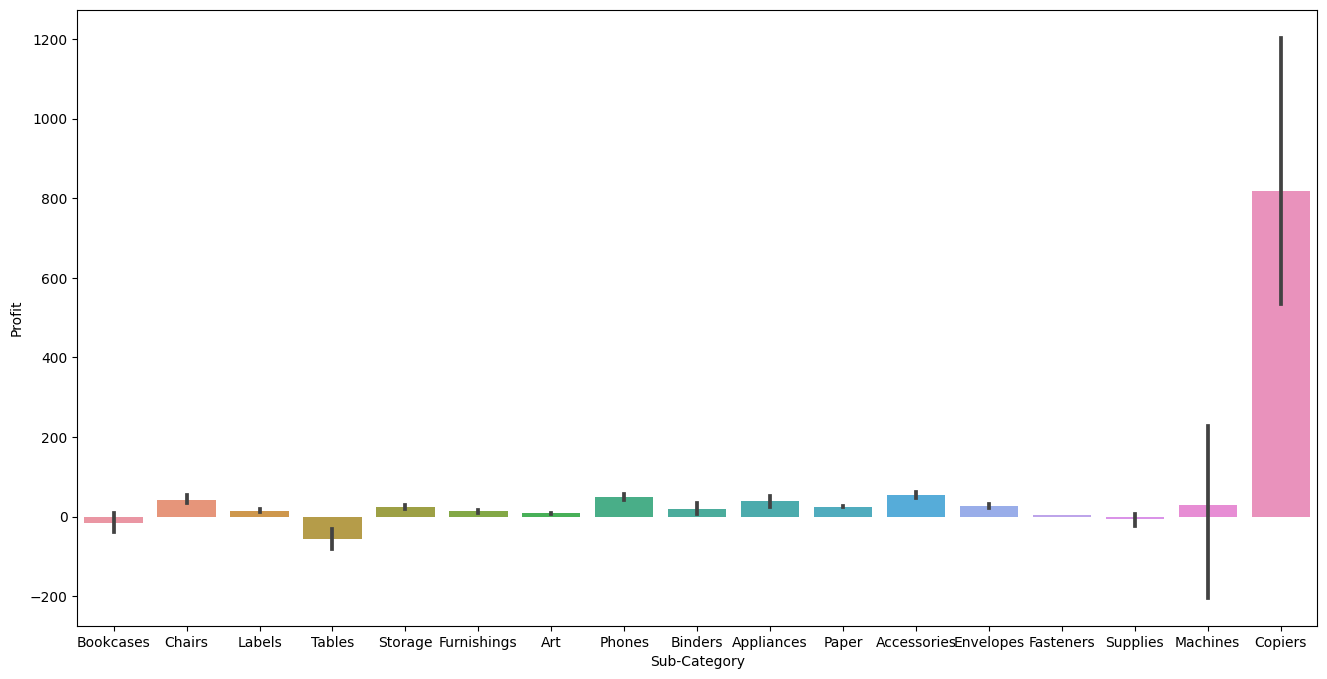

In [66]:
plt.figure(figsize=(16,8))
sns.barplot(x=orders["Sub-Category"],y=orders["Profit"])


# **Line Plot of Discount Vs Profit**

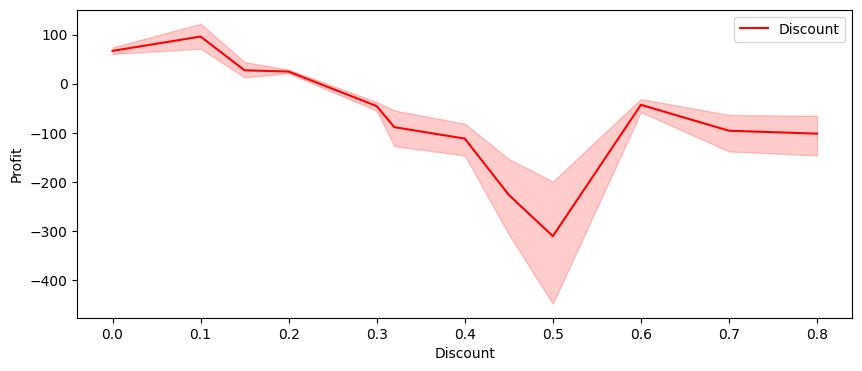

In [67]:
plt.figure(figsize=(10,4))
sns.lineplot(x=orders["Discount"],y=orders["Profit"],color='r',label="Discount")
plt.legend()

# **Histogram of Data Set**

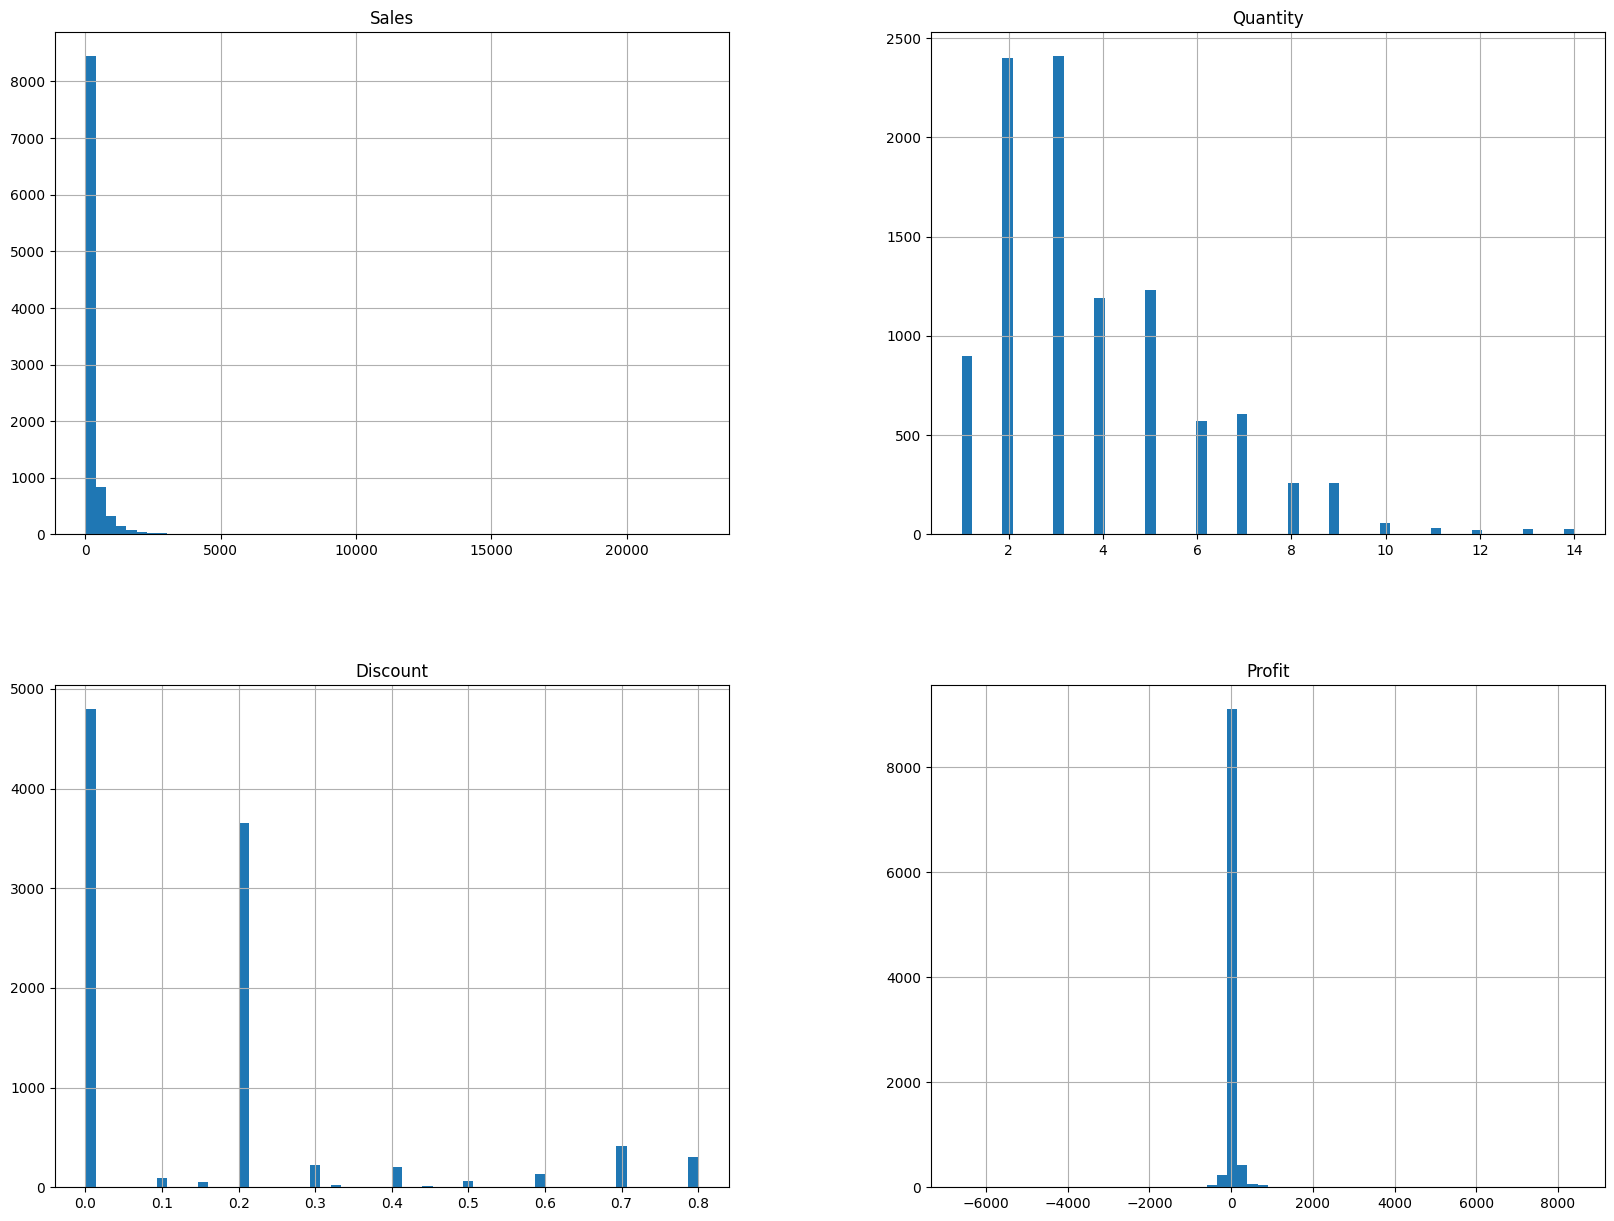

In [68]:
orders.hist(bins=60,figsize=(20,15))
plt.show()

# **Pair plot for Sub category**

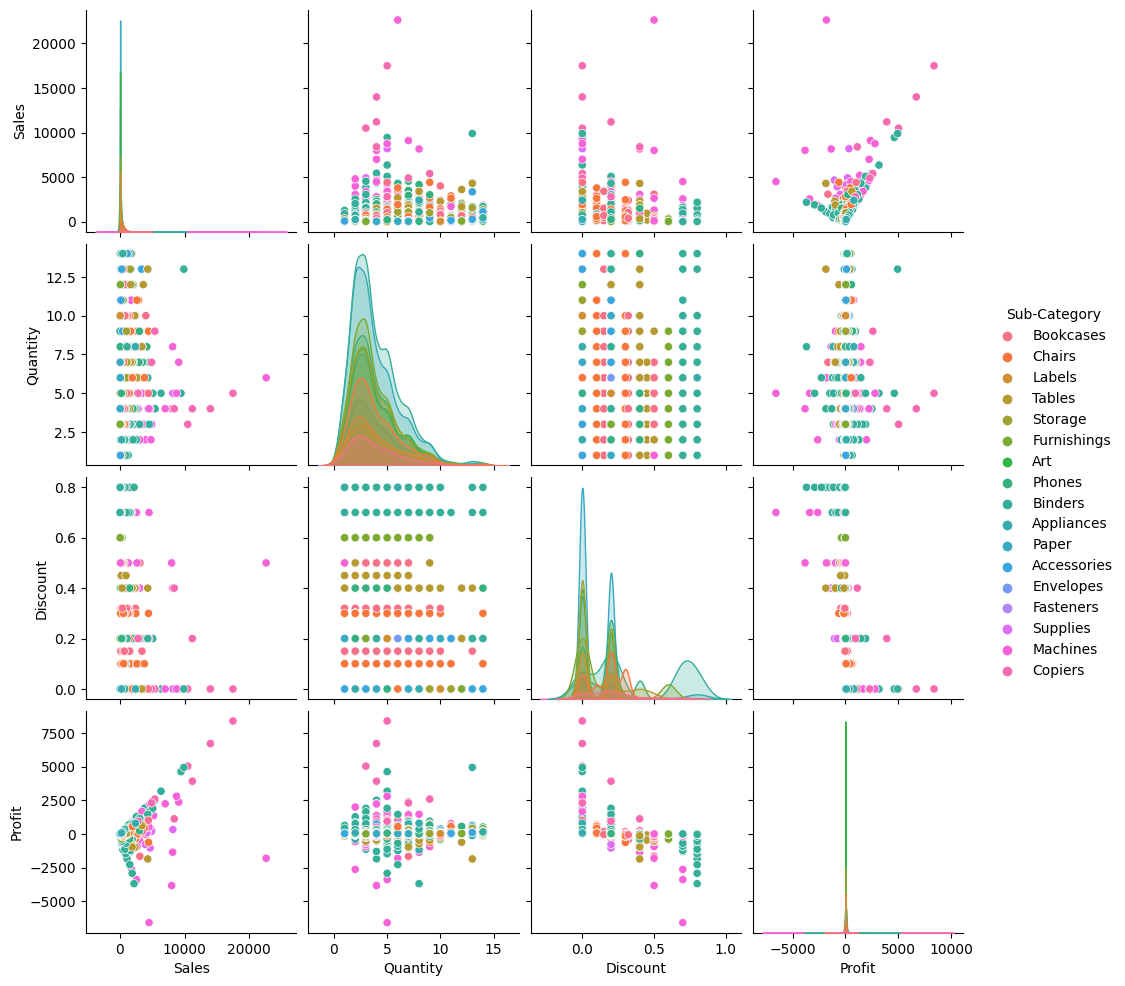

In [69]:
figsize=(16,11)
sns.pairplot(orders,hue="Sub-Category")

# **Group summary of Data Set**

In [70]:
grouped=pd.DataFrame(orders.groupby(["Ship Mode","Segment","Category","Sub-Category","State","Region"])["Quantity","Discount","Sales","Profit"])
grouped

,0,1
0,"(First Class, Consumer, Furniture, Bookcases, ...",Quantity Discount Sales Profit 5465...
1,"(First Class, Consumer, Furniture, Bookcases, ...",Quantity Discount Sales Profit 3...
2,"(First Class, Consumer, Furniture, Bookcases, ...",Quantity Discount Sales Profit 528...
3,"(First Class, Consumer, Furniture, Bookcases, ...",Quantity Discount Sales Profit 933...
4,"(First Class, Consumer, Furniture, Bookcases, ...",Quantity Discount Sales Profit 6150 ...
...,...,...
2978,"(Standard Class, Home Office, Technology, Phon...",Quantity Discount Sales Profit 40 ...
2979,"(Standard Class, Home Office, Technology, Phon...",Quantity Discount Sales Profit 879...
2980,"(Standard Class, Home Office, Technology, Phon...",Quantity Discount Sales Profit 1400...
2981,"(Standard Class, Home Office, Technology, Phon...",Quantity Discount Sales Profit 15...


# **Stat Summary of Data Set**

In [71]:
orders.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


# **Pair Plot of Data Set**

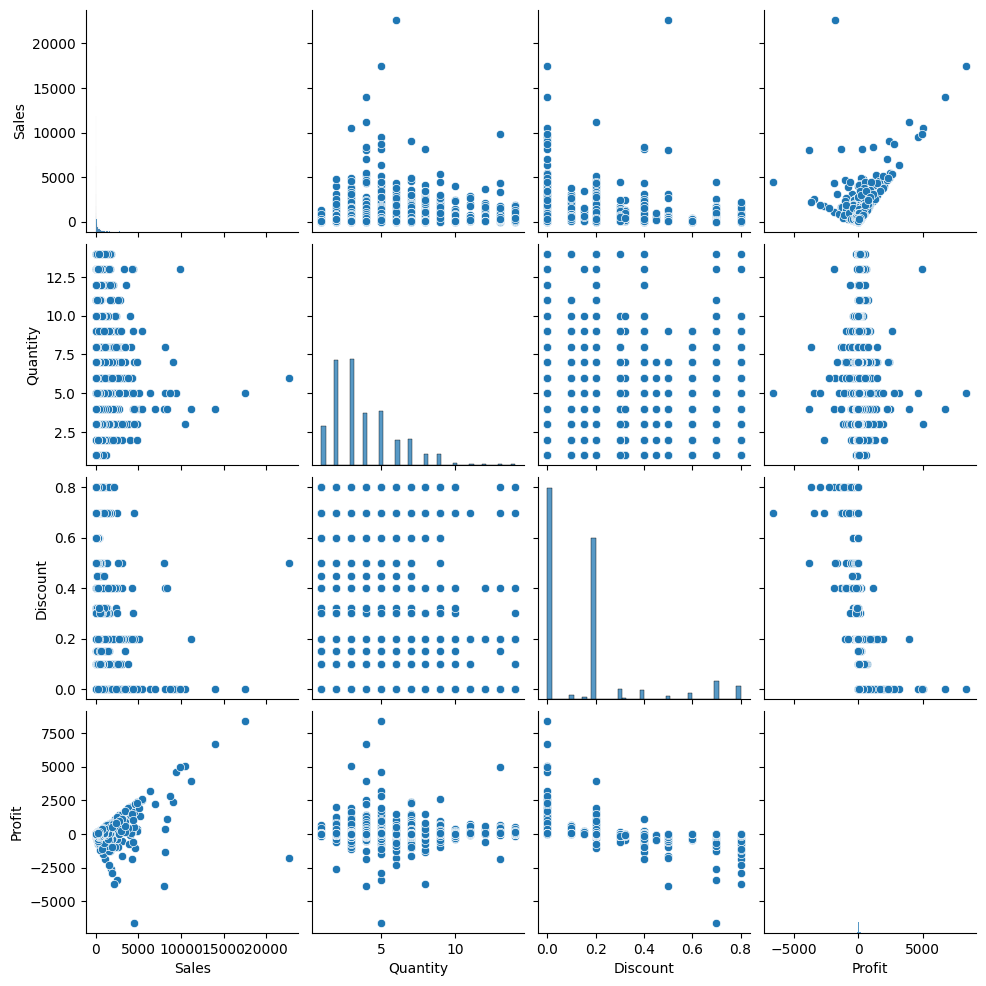

In [72]:
sns.pairplot(orders)

# **Quantile of Data set**

In [73]:
Q1=orders.quantile(q=.25,axis=0,numeric_only=True,interpolation="linear")
Q3=orders.quantile(q=.75,axis=0,numeric_only=True,interpolation="linear")
qua=Q3-Q1
print(qua)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


# **Bar plot of count of Data set**

<Axes: xlabel='Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

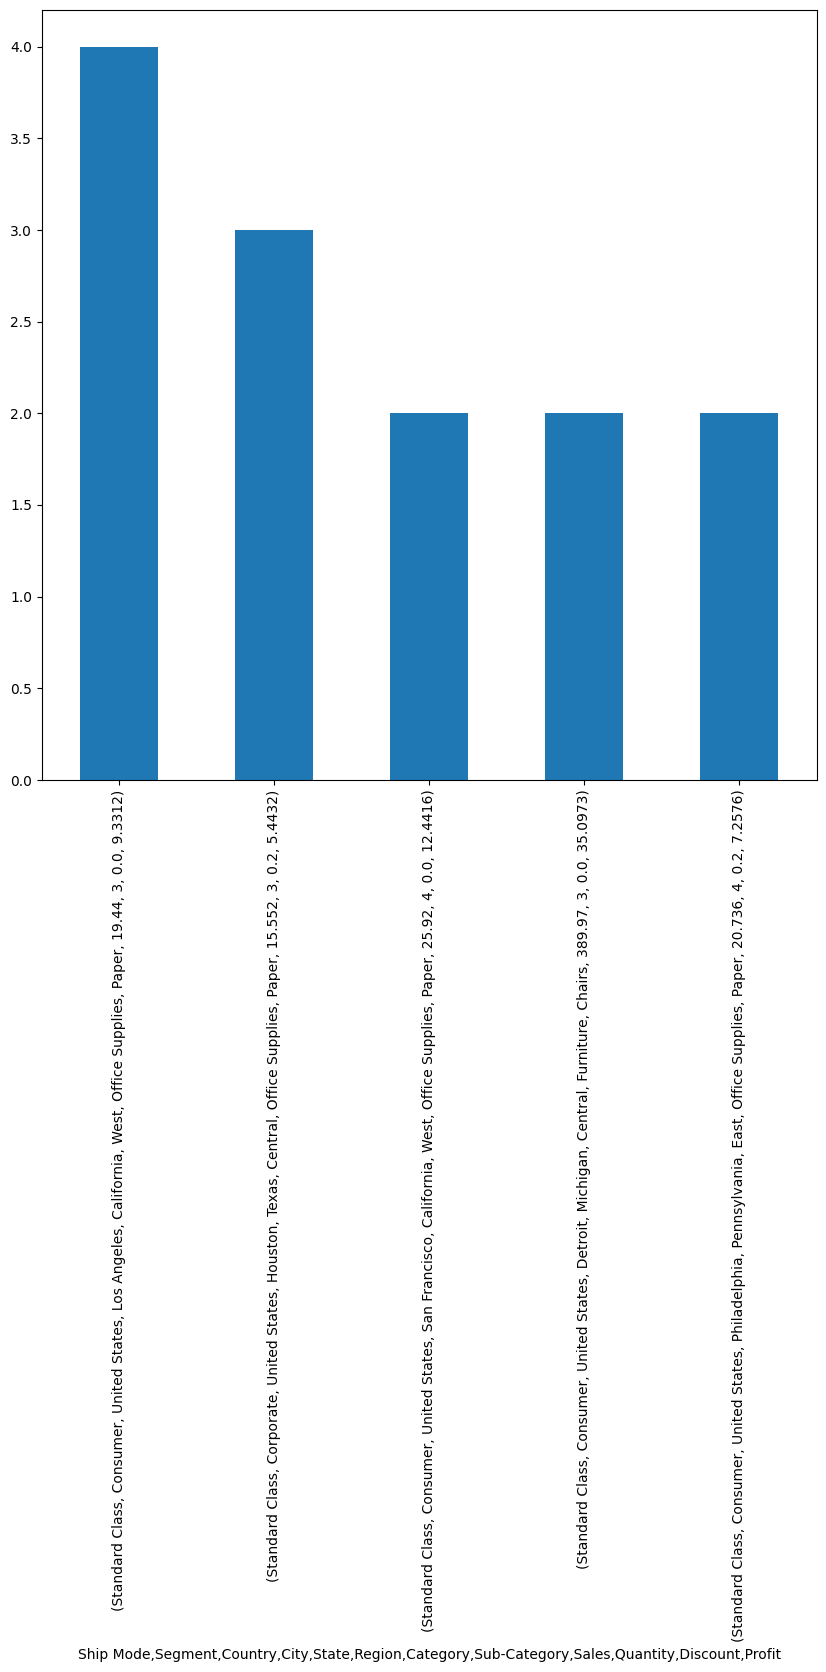

In [78]:
orders.value_counts().nlargest().plot(kind='bar',figsize=(10,10))

# **Plots of Sales and Profit**

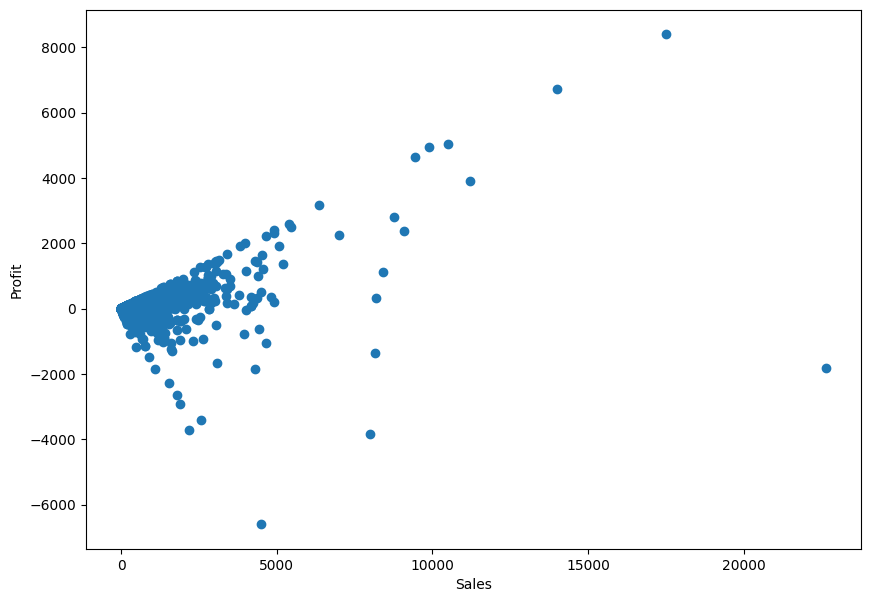

In [80]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(orders["Sales"],orders["Profit"])
ax.set_xlabel("Sales")
ax.set_ylabel("Profit")
plt.show()

# **Sales Stat Data**

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


<Axes: xlabel='Sales', ylabel='Density'>

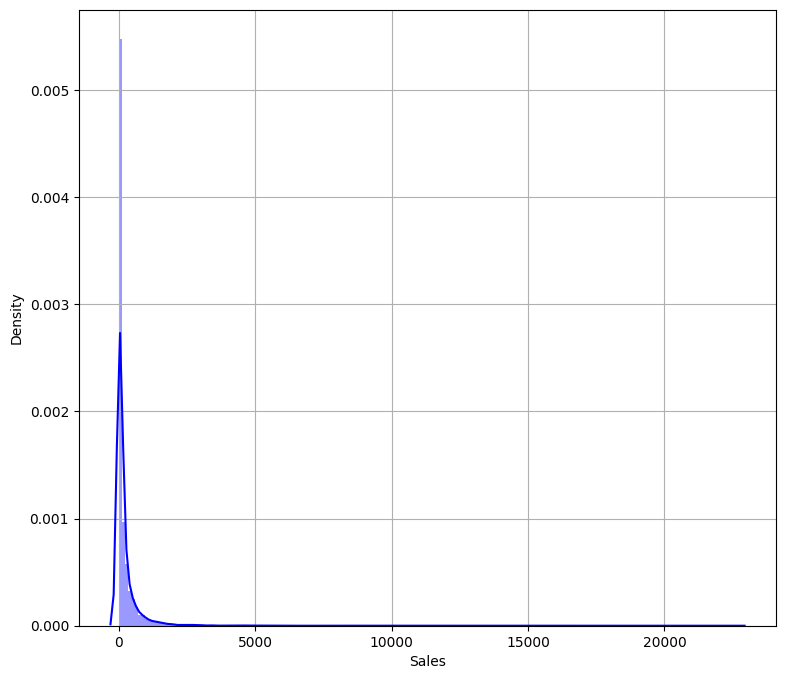

In [81]:
print(orders["Sales"].describe())
plt.figure(figsize=(9,8))
plt.grid()
sns.distplot(orders["Sales"],color='b',bins=190,hist_kws={"alpha":0.4})

# **Box plot for Sales,Quantity,Discount, profit**

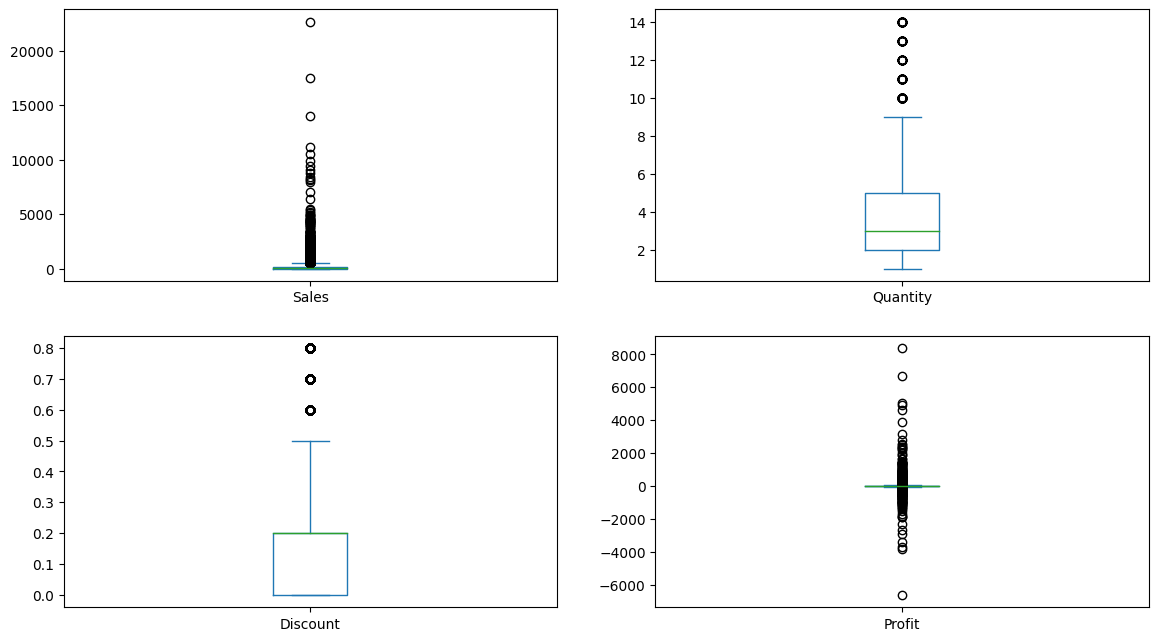

In [92]:
orders.plot(kind="box",subplots=True,layout=(3,2),sharex=False,sharey=False)
plt.rcParams['figure.figsize']=[14,12]
plt.show()